In [2]:
'''This is a prediction analysis on if a patient will have a heart attack or not
given the dataset'''

'''heart attack dataset details
1.)age=age in years (Num)
2.)sex=sex(0 = female, 1 = male) (Cat)
3.)cp=chestpain type(1=typical angina,2=atypical angina,3=non-anginal pain,0=asymptomatic)(Cat)
4.)trtbps=resting blood pressure(in mm Hg on admission to the hospiatal)(Num)
5.)chol=esrum cholestoral in mg/dl (Num)
6.)fbs=fasting blood sugar > 120 mg/dl (0=false, 1=true)(Cat)
7.)restecg=resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)(Cat)
8.)thalachh=maximum heart rate achieved (Num)
9.)exng=exercise induced angina(0 = no, 1 = yes)(Cat)
10.)oldpeak=ST depression induced by exercise relative to rest (Num)
11.)slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)(Cat)
12.)caa=number of major vessels (0-4) colored by flourosopy (Num)
13.)thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)(Cat)
14.)output= 0=less chance of heart attack, 1=more chance of heart attack (Cat)'''

'heart attack dataset details\n1.)age=age in years (Num)\n2.)sex=sex(0 = female, 1 = male) (Cat)\n3.)cp=chestpain type(1=typical angina,2=atypical angina,3=non-anginal pain,0=asymptomatic)(Cat)\n4.)trtbps=resting blood pressure(in mm Hg on admission to the hospiatal)(Num)\n5.)chol=esrum cholestoral in mg/dl (Num)\n6.)fbs=fasting blood sugar > 120 mg/dl (0=false, 1=true)(Cat)\n7.)restecg=resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)(Cat)\n8.)thalachh=maximum heart rate achieved (Num)\n9.)exng=exercise induced angina(0 = no, 1 = yes)(Cat)\n10.)oldpeak=ST depression induced by exercise relative to rest (Num)\n11.)slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)(Cat)\n12.)caa=number of major vessels (0-4) colored by flourosopy (Num)\n13.)thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)(Cat)\n14.)output= 0=less chance of heart attack, 1=more chance of heart attack (Cat)'

In [3]:
'''import the necessary libraries'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier



In [4]:
#import the heart csv dataset -> analyze the top 5 rows
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#check some info about the dataset
df.info()

#we can see there are 303 patients(rows) and the types of each column
#13 features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# SECTION 1

### THIS SECTION WILL FOCUS ON THE EXPLORATORY DATA ANALYSIS OF ALL THE FACTORS

In [6]:
#check for missing values in the dataset
#we expect either a true or a false
df.isna().any().any()

#the result was false so we are not missing any data

False

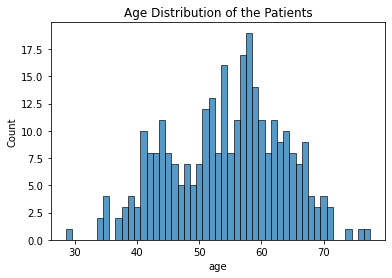

In [7]:
'''Now we need to take a closer look and analyze the columns'''

#first let's analyze the age column
sns.histplot(df.age, discrete=True)
plt.title('Age Distribution of the Patients')
plt.show()

#we can see that most patients are above 40 years old and normal distribution
#the peak is at about 57/58 years old

,sex
1,207
0,96


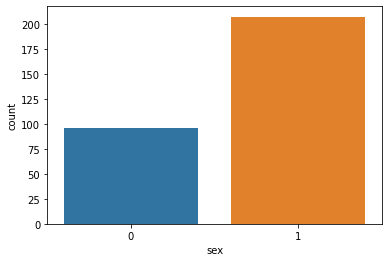

In [8]:
#next analyze the gender column
sns.countplot(x ='sex', data = df) #this plots a countplot for the df for sex column
df.sex.value_counts().to_frame() #shows the numerical values

#from this we can see there are more males than females

,cp
0,143
2,87
1,50
3,23


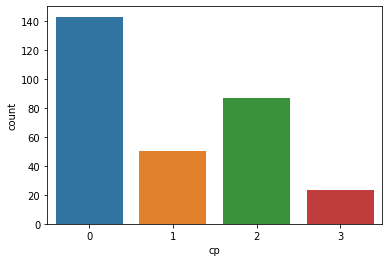

In [9]:
#analyze the chest pain type => 4 different types of pain
sns.countplot(x ='cp', data = df) #another countplot for chest pain since it's categorical
df.cp.value_counts().to_frame()

#we can see the most types of chest pain is 0 -> asymptomatic 
#this could possibly correlate with age

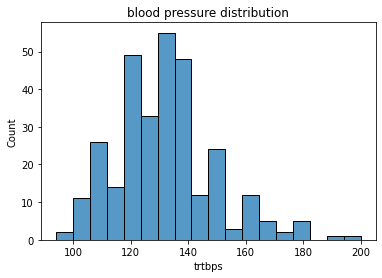

In [10]:
#analyze resting blood pressure
sns.histplot(df.trtbps)
plt.title("blood pressure distribution")
plt.show()

#roughly normal distribution 
#peak blood pressure is around 130/135 

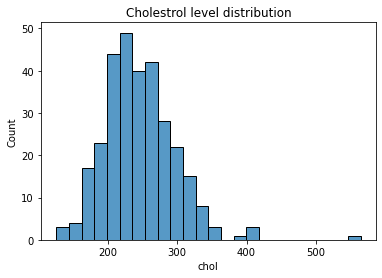

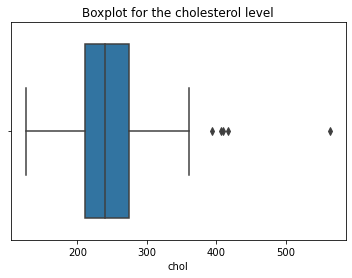

In [11]:
#analyze cholestrol variable
sns.histplot(df.chol)
plt.title('Cholestrol level distribution')
plt.show()

#the distribution has a roughly normal shape
#skewed to the right with the outlier at 600
#lets use a boxlot to see it

sns.boxplot(data=df, x='chol')
plt.title('Boxplot for the cholesterol level')
plt.show()
#Yes, the cholesterol is higher than approx. 360 can be considered 
#as outliers. But we can not delete them, because it's realistic values.

,fbs
0,258
1,45


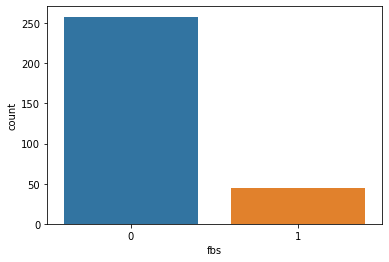

In [12]:
#Analyze Fasting Blood Sugar
#0 means < 120, 1 mean > 120
sns.countplot(x ='fbs', data = df) #this plots a countplot for the df for sex column
df.fbs.value_counts().to_frame() #shows the numerical values

#from this we can see that a majority of the patients do not have serious sugar problems

,restecg
1,152
0,147
2,4


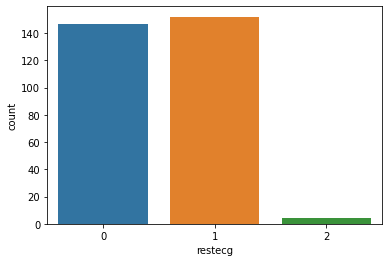

In [13]:
#analyze ECG column
#resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)
sns.countplot(x ='restecg', data = df) #another countplot for chest pain since it's categorical
df.restecg.value_counts().to_frame()

#we can see that most patients have hypertrophy and a few abnormals

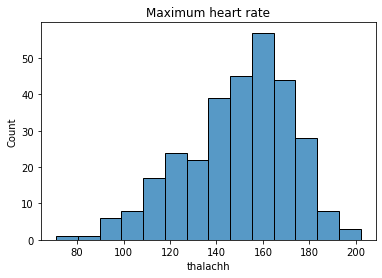

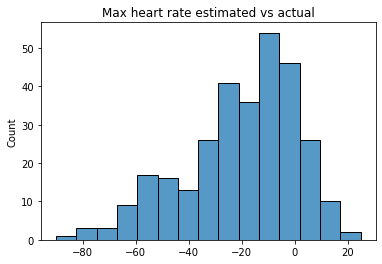

In [14]:
#thalachh=maximum heart rate achieved
#Analyze maximum heart rate achieved
sns.histplot(df.thalachh)
plt.title('Maximum heart rate')
plt.show()
#the graph seems to be roughly normal with a slight skew left

#MHR can be estimated with this equation => MHR = 208-(0.7 x age)

#lets look at how many patients have their maximum heart rate achived is higher than estimated
sns.histplot(df.thalachh - (208 - (0.7 * df.age)))
plt.title('Max heart rate estimated vs actual')
plt.show()
#from this graph we can see that most patients have a lower MHR than estimated

,exng
0,204
1,99


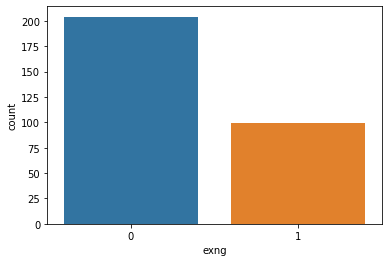

In [15]:
#exng=exercise induced angina(0 = no, 1 = yes)
#Analyze exercise induced angina

sns.countplot(x ='exng', data = df) #another countplot for chest pain since it's categorical
df.exng.value_counts().to_frame()

#more than half of patients do not have exercise induced angina(chest pain)

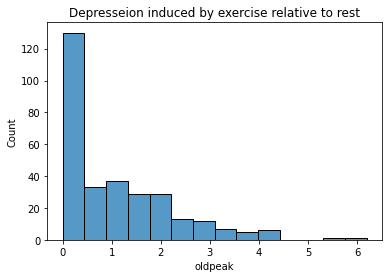

In [16]:
#oldpeak=ST depression induced by exercise relative to rest
#Analyze oldpeak 
sns.histplot(df.oldpeak)
plt.title('Depresseion induced by exercise relative to rest')
plt.show()

#narrow peak at 0 and distribution skewed to the right

,slp
2,142
1,140
0,21


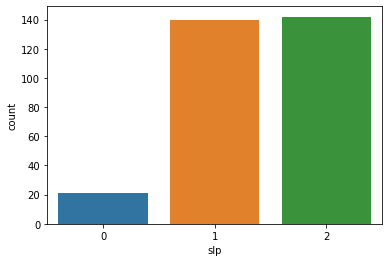

In [17]:
#slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)
#Analyze the slope
sns.countplot(x ='slp', data = df) #another countplot for chest pain since it's categorical
df.slp.value_counts().to_frame()

#about half and half of patients either have a flat slope or upsloping
#small number of patients downsloping

,caa
0,175
1,65
2,38
3,20
4,5


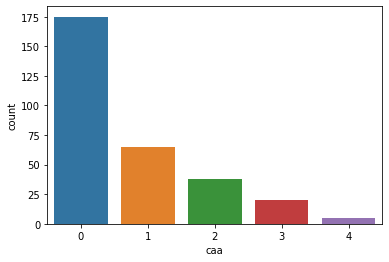

In [18]:
#caa=number of major vessels (0-4) colored by flourosopy
#Analyze the number of major vessels
sns.countplot(x ='caa', data = df) #another countplot for chest pain since it's categorical
df.caa.value_counts().to_frame()

#more than half the patients do not have major vessels

,thall
2,166
3,117
1,18
0,2


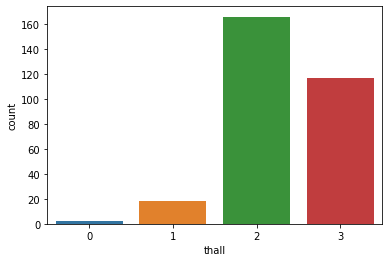

In [19]:
#thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)
#Analyze the stress numbers
sns.countplot(x ='thall', data = df) #another countplot for chest pain since it's categorical
df.thall.value_counts().to_frame()


In [20]:
#most of the patients have normal results or reversable defects
#we can see that there are patients with a zero even though they are not listed
#analyze the zero patients
df.query('thall == 0')


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [21]:
#after analyzing the zero we see nothing out of the ordinary
#we can conclude that the zero's are missing data
#handle the missing data by using KNN imputer
#The idea in kNN methods is to identify 'k' samples in the dataset
#that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the dataset.
df['thall'] = df['thall'].replace({0 : np.nan})
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['thall'] = df['thall'].round()

,output
1.0,0.544554
0.0,0.455446


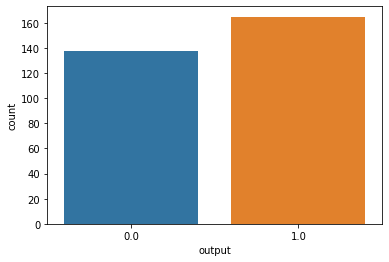

In [22]:
#FINALLY analyze the output 
#(0 = less chance of heart attack, 1 = higher chance)
sns.countplot(x='output', data=df)
df.output.value_counts().to_frame()

#from this we can see that the distribution is about half and half
#this is what we are going to try and predict

#put them into percentages
df.output.value_counts(normalize=True).to_frame()
#roughly 54 percent of patients were at a HIGHER risk of heart attack
#roughly 45 percent of patients were at a LOWER risk of heart attack 

# SECTION 2

### LOOKING MORE INTO HOW THE FACTORS RELATE TO OUR TARGET VARIABLE NOW

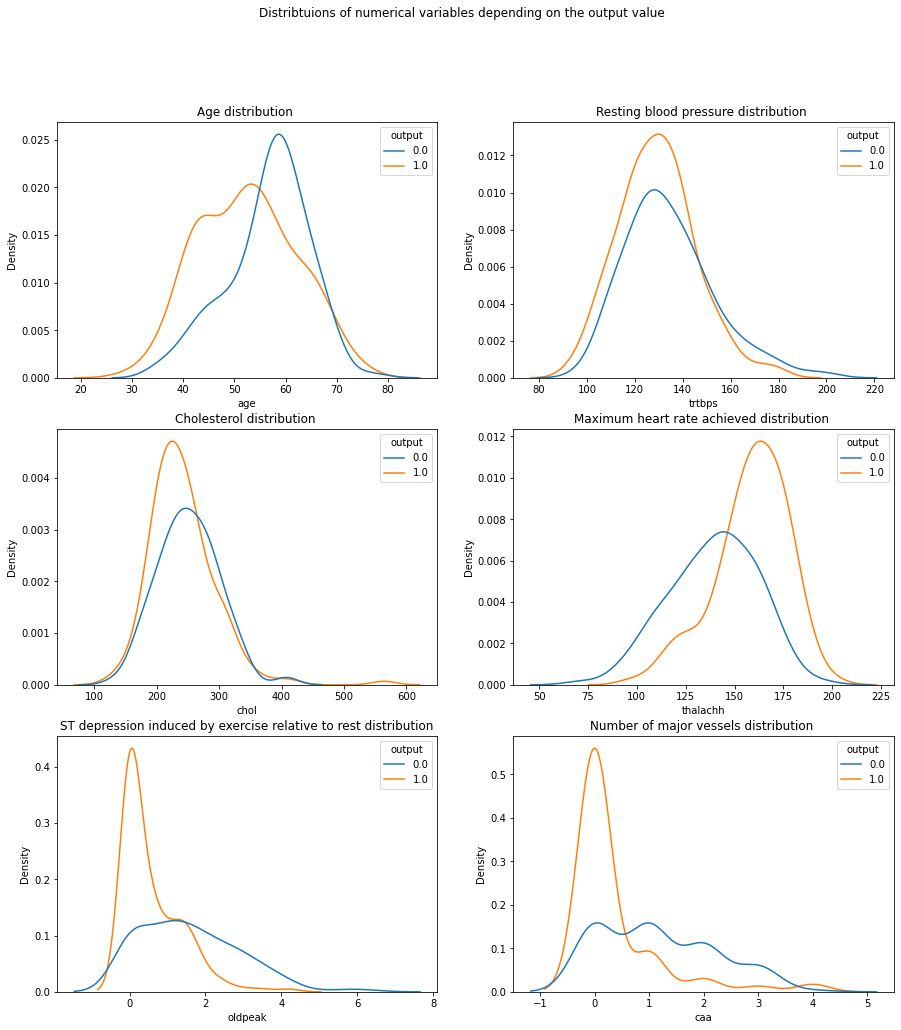

In [23]:
#We will analye the numerical values first
#since the target is categorical we cannot apply correlation analysis

#BUILDING a distribution for each of the numerical values depending on 
#target value
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
sns.kdeplot(data=df, x='caa', hue='output', ax=axes[2, 1])
axes[2, 1].set_title('Number of major vessels distribution ')
plt.suptitle('Distribtuions of numerical variables depending on the output value')
plt.show()


-From the charts above...we see that Blood Pressure and Cholestrol don't have much influence on the result...

-oldpeak, caa and thalachh seem to have definite influences on the result

-we also see that younger people tend to be at higher risk than older, which is a surprising finding

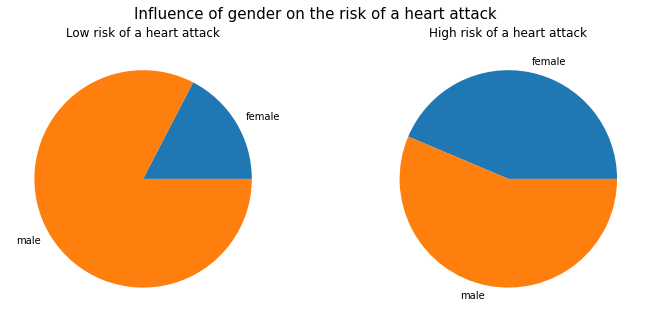

,output,sex
0,0.0,0.826087
1,1.0,0.563636


In [24]:
#We will analye the Categorical Variables NOW
#since most of the classes are balanced we will use pie plots to compare
#based on the outputs

_, axes = plt.subplots(1, 2, figsize=(12,5))

#this is the pie plot for heart attack risks based on gender
axes[0].pie(df.query('output == 0').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of gender on the risk of a heart attack', fontsize=15)
plt.show()

#showing the dataframe of gender column with respect to the output
df.groupby('output', as_index=False)['sex'].mean()

-Of the patients with low risk of heart attack...we see that roughly 82% of the patients are male.
-of the patients with high risk of heart attack...we see that males make up 56.4% percent of patients. We can conclude from this result that females are more prone to heart attacks. 

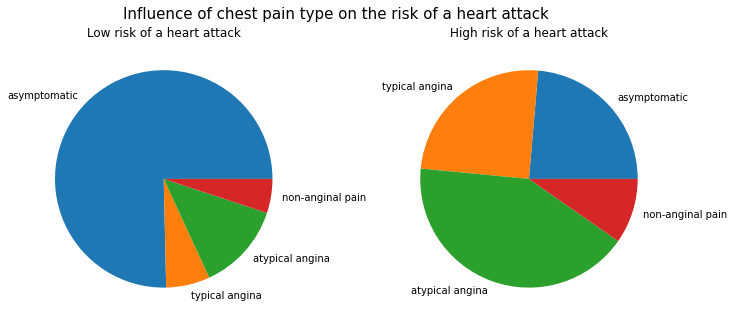

In [25]:
#NEXT we will analyze chest pain type with respect to the output
_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain']

axes[0].pie(df.query('output == 0').groupby('cp')['cp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('cp')['cp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of chest pain type on the risk of a heart attack', fontsize=15)
plt.show()



From this chart we can see that any chest pain type does not give us any definitive evidence. Each chest pain group is likely to be in both categories.

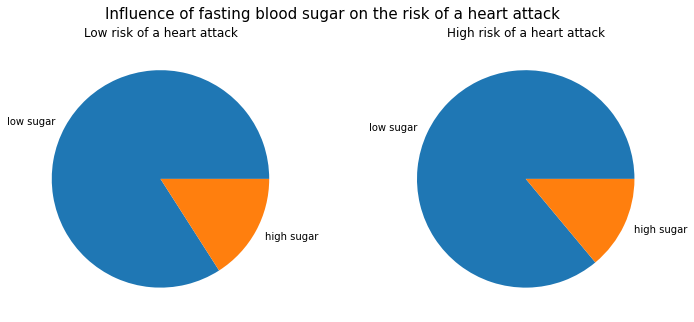

In [26]:
#NEXT we will analyze blood sugar type with respect to the output
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['low sugar', 'high sugar']

axes[0].pie(df.query('output == 0').groupby('fbs')['fbs'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('fbs')['fbs'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of fasting blood sugar on the risk of a heart attack', fontsize=15)
plt.show()

Fasting blood sugar has no affect on the risk of a heart attack in patients.

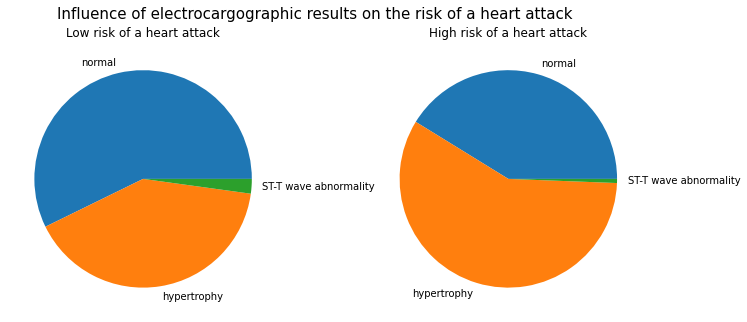

In [27]:
#NEXT we will analyze resting electrocariographic with respect to the output
_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['normal', 'hypertrophy', 'ST-T wave abnormality']

axes[0].pie(df.query('output == 0').groupby('restecg')['restecg'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('restecg')['restecg'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of electrocargographic results on the risk of a heart attack', fontsize=15)
plt.show()



People with a hypertrophy are more prone to getting a heart attack from the results

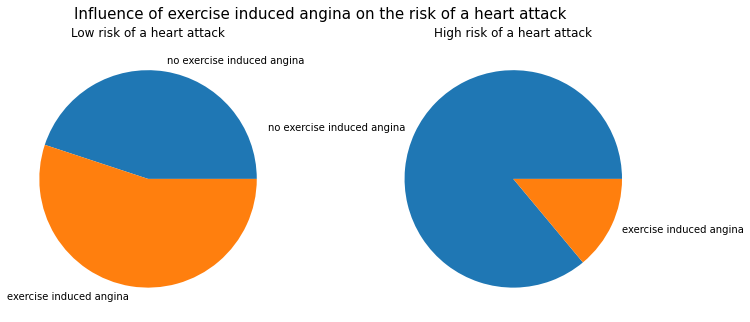

In [28]:
#NEXT we will analyze exercising induced angina with respect to the output
#A type of chest pain caused by reduced blood flow to the heart.
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['no exercise induced angina', 'exercise induced angina']

axes[0].pie(df.query('output == 0').groupby('exng')['exng'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('exng')['exng'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of exercise induced angina on the risk of a heart attack', fontsize=15)
plt.show()

From the results we can see that...angina that was not caused by exercise is a higher risk of a heart attack. Exercise induced angina is more likely to be a lower risk of heart attack.

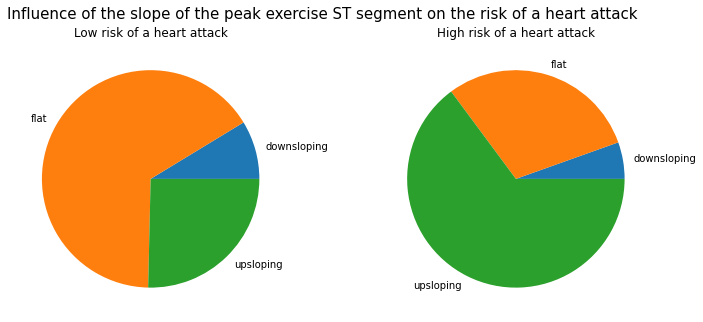

In [29]:
#Analyze the slope of the peak exercise ST segment relative to the output

_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['downsloping', 'flat', 'upsloping']

axes[0].pie(df.query('output == 0').groupby('slp')['slp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('slp')['slp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the slope of the peak exercise ST segment on the risk of a heart attack', fontsize=15)
plt.show()


We can see that those with an upslope have a higher risk of heart attack. Those with flat and downsloping slope, have a lower risk of heart attack.


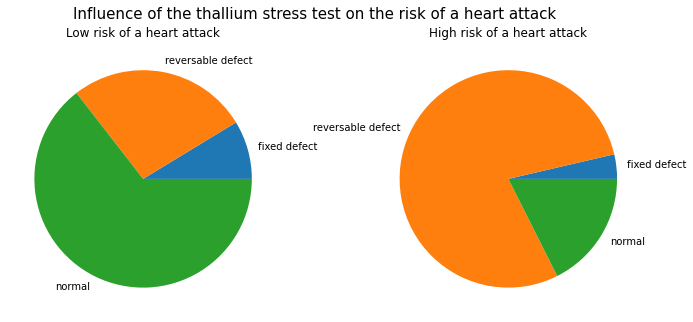

In [30]:
#Analyze thallium stress test relative to the outputs
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['fixed defect', 'reversable defect', 'normal']

axes[0].pie(df.query('output == 0').groupby('thall')['thall'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('thall')['thall'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the thallium stress test on the risk of a heart attack', fontsize=15)
plt.show()

Thallium stress test results affect the chance to be in the risk group. People with normal results are less prone to a heart attack.

In [31]:
'''Out dataset is built the way when the low categorical value
means a good condition, and high categorical value means a bad condition
(exng is equal to 0 when no angina, restecg is equal to 0 when normal 
results). Only one exception is thall feature. Let's change this by 
mapping.'''
#changing the mapping of our column to make it consistent with whole dataset
df['thall'] = df['thall'].map({3 : 0, 1 : 2, 2 : 1})

df.query('cp == 0 and restecg == 0 and exng == 0 and thall == 0')['output'].value_counts()


0.0    13
Name: output, dtype: int64

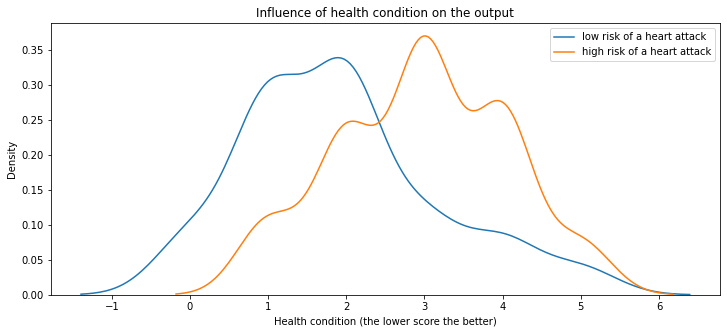

In [32]:
#SUMMARIZING ALL THE FEATURES IN ONE AND CHECK DISTRIBUTIONS
plt.figure(figsize=(12,5))
df_0 = df.query('output == 0')
df_1 = df.query('output == 1')
sns.kdeplot(df_0.cp + df_0.restecg + df_0.exng + df_0.thall, label='low risk of a heart attack')
sns.kdeplot(df_1.cp + df_1.restecg + df_1.exng + df_1.thall, label='high risk of a heart attack')
plt.title('Influence of health condition on the output')
plt.xlabel('Health condition (the lower score the better)')
plt.legend()
plt.show()

So we know that the lower scores generally mean the better result throughout this dataset...so from this chart we can see that the highest density of high risk heart attack patients is between 3 and 4. This means that patients with better health(based on the lower numbers) has a lower chance of having a heart attack.

## Conclusions
The majority of the patients are older than 40.<br/><br/>
In the dataset there are 2 times more males than females.<br/><br/>
54.5% of the patients have a high risk of heart attack, 45.5% - low risk  of a heart attack. The classes are relatively balanced. <br/><br/>
The following numerical features affect the output: age, maximum heart rate achieved, ST depression induced by exercise relative to rest distribution, and the number of major vessels.<br/><br/>
All categorical features, except fasting blood sugar, affect the output.<br/><br/>
Age distribution of patients from the high-risk group has a peak at 50-52 ages.<br/><br/>
Women are more prone to a heart attack than men.<br/><br/>
Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

# SECTION 3

### IN THIS SECTION WE WILL TRY TO BUILD NEW FEATURES THAT COULD HELP US PREDICT THE OUTCOMES. COMBINE WHAT WE ALREADY HAVE.

In [33]:
#first we are going to copy the original dataset so we can compare the new dataset we will make
df_new = df.copy()


In [34]:
#let's check which features are important by running the importance function from RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=8, n_estimators=100, random_state = 42)
rf_classifier.fit(df.drop('output', axis=1), df['output'])

importance = pd.concat([pd.Series(df.columns[:-1]),
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
2,cp,0.143875
7,thalachh,0.125165
12,thall,0.109902
11,caa,0.109500
9,oldpeak,0.106870
0,age,0.081869
4,chol,0.073372
3,trtbps,0.072702
8,exng,0.059275
10,slp,0.051713


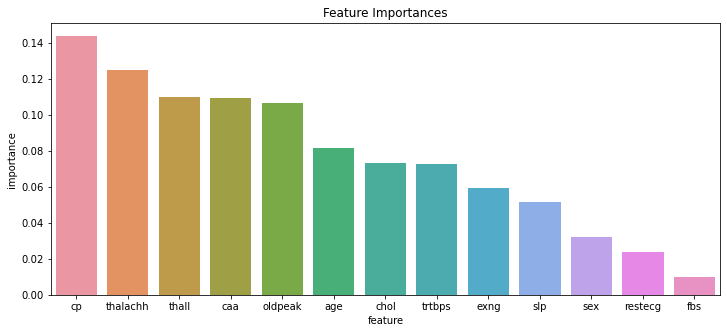

In [35]:
#graph the findings we got about the importance of our features
plt.figure(figsize=(12,5))
sns.barplot(data=importance, x='feature',y='importance')
plt.title('Feature Importances')
plt.show()

#from this chart we can see that blood sugar has the lowest importance 

In [36]:
#since we found that blood sugar has a low importance, we can remove the feature
df_new = df_new.drop('fbs', axis=1)


In [37]:
#although the sex and rest esg says that they are not important
#the EDA shows us that they are actually important



The feature, that has an influence on the output, is the maximum heart rate achieved. In medical practice it's calculated using the following equation:

𝑀𝐻𝑅=208−(0.7×𝑎𝑔𝑒)
 
We can use it as a new feature.

In [38]:
#this creates a new column with these computations
df_new['mhr_estimation'] = 208 - 0.7 * df_new['age']


#### make categorical features out of blood pressure

pressure < 120 = 0 (normal)
120 <= pressure < 140 = 1 (elevated)
140 <= pressure = 2 (high)

In [39]:
#basically a function that says 
#if blood pressure < 120 = 0
#if blood pressure < 140 and > 120 = 1
#if blood pressure > 140 = 2
df_new['blood_pres_cat'] = df_new['trtbps'].apply(lambda x:0 if x < 120 else (1 if x < 140 else 2))

df_new['blood_pres_cat'].value_counts().to_frame()


,blood_pres_cat
1,146
2,97
0,60


#### make categorical features out of cholestrol

cholesterol < 200 = 0 (desirable) <br/>
200 <= cholesterol < 240 = 1 (borderline)<br/>
240 <= cholesterol = 2 (high)

In [40]:
df_new['cholestrol_cat'] = df_new['chol'].apply(lambda x:0 if x<200 else (1 if x < 240 else 2))
df_new['cholestrol_cat'].value_counts().to_frame()



,cholestrol_cat
2,155
1,98
0,50


We can combine the last two features that we created <br/>
If a person has a low blood pressure and low cholestrol <br/>
they get a 0, if they have both high then they get a 4<br/>
Basically higher numbers are worse health

In [41]:
df_new['pres_chol_sum_cat'] = df_new['blood_pres_cat'] + df_new['cholestrol_cat']
df_new['pres_chol_sum_cat'].value_counts().to_frame()


,pres_chol_sum_cat
3,109
2,84
4,52
1,45
0,13


Combine all the new categorical variables together to make a new column


In [42]:
df_new['cat_sum'] = df_new['cp'] + df_new['restecg'] + df_new['exng']+ df_new['thall']

df_new['cat_sum'].value_counts().to_frame()

#for this one...basically the higher the number, the worse health you have


,cat_sum
2.0,85
3.0,73
1.0,60
4.0,54
5.0,18
0.0,13


In [43]:
#LETS LOOK AT THE NEW DATAFRAME THAT WE HAVE
df_new.head()


,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,mhr_estimation,blood_pres_cat,cholestrol_cat,pres_chol_sum_cat,cat_sum
0,63.0,1.0,3.0,145.0,233.0,0.0,150.0,0.0,2.3,0.0,0.0,2,1.0,163.9,2,1,3,5.0
1,37.0,1.0,2.0,130.0,250.0,1.0,187.0,0.0,3.5,0.0,0.0,1,1.0,182.1,1,2,3,4.0
2,41.0,0.0,1.0,130.0,204.0,0.0,172.0,0.0,1.4,2.0,0.0,1,1.0,179.3,1,1,2,2.0
3,56.0,1.0,1.0,120.0,236.0,1.0,178.0,0.0,0.8,2.0,0.0,1,1.0,168.8,1,1,2,3.0
4,57.0,0.0,0.0,120.0,354.0,1.0,163.0,1.0,0.6,2.0,0.0,1,1.0,168.1,1,2,3,3.0


#### Run the model on the two different datasets and see how it does
First, we are running the original dataset <br/>
Next, we will run the same model on the edited dataset

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#we are running different models on dataset to see which one runs best
#after we find the best, we will test old and new dataset
#setting our y values and our x values for the model
y = df['output']
X = df.drop('output', axis=1)

'''Gaussian Model ''' 
gnb = GaussianNB()
cv = cross_val_score(gnb, X, y, cv=5)
print(cv)
print("Gaussian model mean: "+ str(cv.mean()))

'''Logistic Regression Model '''
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X, y, cv=5)
print(cv)
print("Log Regression mean: " + str(cv.mean()))

'''Decision Tree '''
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X, y, cv=5)
print(cv)
print("Decision Tree mean: " + str(cv.mean()))

'''KNeighbors model'''
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X, y, cv=5)
print(cv)
print("KNN mean: " + str(cv.mean()))

'''Random Forest Classifier'''
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X, y, cv=5)
print(cv)
print("Random Forest mean: " + str(cv.mean()))

'''Support Vector Clustering'''
svc = SVC(probability = True)
cv = cross_val_score(svc, X, y, cv=5)
print(cv)
print("SVM mean: " + str(cv.mean()))


[0.80327869 0.90163934 0.78688525 0.85       0.71666667]
Gaussian model mean: 0.8116939890710382
[0.81967213 0.90163934 0.83606557 0.88333333 0.75      ]
Log Regression mean: 0.8381420765027322
[0.75409836 0.86885246 0.75409836 0.73333333 0.71666667]
Decision Tree mean: 0.7654098360655738
[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
KNN mean: 0.643879781420765
[0.83606557 0.86885246 0.81967213 0.8        0.81666667]
Random Forest mean: 0.8282513661202187
[0.60655738 0.60655738 0.73770492 0.68333333 0.58333333]
SVM mean: 0.6434972677595628


### After running the models, we can see, the Log Regression gave the best results...


In [45]:
#now we run the original dataset vs the edited dataset

lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X, y, cv=5)
print(cv)
print("Log Regression OG dataset mean: " + str(cv.mean()))

df_new_y = df_new['output']
df_new_X = df_new.drop('output', axis=1)

lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, df_new_X, df_new_y, cv=5)
print(cv)
print("Log Regression New dataset mean: " + str(cv.mean()))

#we can see that the new dataset gives us slightly better results/accuracy
#in conclusion => we see that our new data gives us better results


[0.81967213 0.90163934 0.83606557 0.88333333 0.75      ]
Log Regression OG dataset mean: 0.8381420765027322
[0.80327869 0.90163934 0.81967213 0.86666667 0.76666667]
Log Regression New dataset mean: 0.831584699453552


# SECTION 4
## Data Preparation
### since we don't have missing data, we just need to separate numerical variables and categorical variables

In [46]:
#set the varaibles to numerical variales and categorical
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 
                'mhr_estimation']
cat_features = ['sex', 'cp', 'restecg', 'exng', 'slp', 
                'thall', 'blood_pres_cat', 'cholestrol_cat', 'pres_chol_sum_cat', 'cat_sum']


In [47]:
#now we need to make a matrix for the variables and the target for the model
catBoostFeatures = df_new.drop('output', axis=1)
catBoostResults = df_new['output'].astype('int')
features = df_new.drop('output', axis=1)
result = df_new['output'].astype('int')

#make sure we have the correct amount of numbers and rows
print(catBoostFeatures.shape)
print(catBoostResults.shape)
print(features.shape)
print(result.shape)



(303, 17)
(303,)
(303, 17)
(303,)


In [48]:
#create dummy variables for the categorical data
features_dummy = pd.get_dummies(features, 
                                drop_first=True, 
                                columns=cat_features)

features_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholestrol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
0,63.0,145.0,233.0,150.0,2.3,0.0,163.9,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,37.0,130.0,250.0,187.0,3.5,0.0,182.1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
2,41.0,130.0,204.0,172.0,1.4,0.0,179.3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,56.0,120.0,236.0,178.0,0.8,0.0,168.8,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,57.0,120.0,354.0,163.0,0.6,0.0,168.1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [49]:
#GOING TO USE CATBOOST TO CREATE OUR PREDICTION MODEL
#boosting = combining multiple weak models together to continously
#get better results and end with a strong model

#split the data into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(features_dummy, 
                                                    result, 
                                                    test_size=0.2, 
                                                    random_state=42) 

#splitting 20 percent of dataset into the test sets


In [50]:
#check the size of our new data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) #the results for our train
print(y_test.shape)  #the results for our test to compare to


(242, 31)
(61, 31)
(242,)
(61,)


In [51]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholestrol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
132,42.0,120.0,295.0,162.0,0.0,0.0,178.6,1,1,0,...,1,0,0,1,0,0,0,1,0,0
202,58.0,150.0,270.0,111.0,0.8,0.0,167.4,1,0,0,...,1,0,0,0,1,1,0,0,0,0
196,46.0,150.0,231.0,147.0,3.6,0.0,175.8,1,0,1,...,0,0,0,1,0,0,0,0,1,0
75,55.0,135.0,250.0,161.0,1.4,0.0,169.5,0,1,0,...,1,0,0,1,0,0,1,0,0,0
176,60.0,117.0,230.0,160.0,1.4,2.0,166.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [52]:
X_test.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholestrol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
179,57.0,150.0,276.0,112.0,0.6,1.0,168.1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
228,59.0,170.0,288.0,159.0,0.2,0.0,166.7,1,0,0,...,1,0,0,0,1,0,0,1,0,0
111,57.0,150.0,126.0,173.0,0.2,1.0,168.1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
246,56.0,134.0,409.0,150.0,1.9,2.0,168.8,0,0,0,...,1,0,0,1,0,1,0,0,0,0
60,71.0,110.0,265.0,130.0,0.0,1.0,158.3,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [53]:
#next we need to scale our data using standardization
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


<ipython-input-53-db1a7901d749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.fit_transform(X_train[num_features])
/Users/devinheng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-53-db1a7901d749>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [54]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholestrol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
132,-1.356798,-0.616856,0.914034,0.532781,-0.920864,-0.689701,1.356798,1,1,0,...,1,0,0,1,0,0,0,1,0,0
202,0.385086,1.169491,0.439527,-1.753582,-0.193787,-0.689701,-0.385086,1,0,0,...,1,0,0,0,1,1,0,0,0,0
196,-0.921327,1.169491,-0.300704,-0.139679,2.350982,-0.689701,0.921327,1,0,1,...,0,0,0,1,0,0,0,0,1,0
75,0.058483,0.276318,0.059921,0.487950,0.351521,-0.689701,-0.058483,0,1,0,...,1,0,0,1,0,0,1,0,0,0
176,0.602822,-0.795490,-0.319684,0.443119,0.351521,1.333421,-0.602822,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
X_test.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholestrol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
179,0.276218,1.169491,0.553408,-1.708752,-0.375556,0.321860,-0.276218,1,0,0,...,1,0,0,0,1,0,0,1,0,0
228,0.493954,2.360389,0.781172,0.398289,-0.739095,-0.689701,-0.493954,1,0,0,...,1,0,0,0,1,0,0,1,0,0
111,0.276218,1.169491,-2.293633,1.025918,-0.739095,0.321860,-0.276218,1,0,1,...,0,0,1,0,0,0,0,1,0,0
246,0.167350,0.216773,3.077785,-0.005187,0.805944,1.333421,-0.167350,0,0,0,...,1,0,0,1,0,1,0,0,0,0
60,1.800367,-1.212304,0.344625,-0.901800,-0.920864,0.321860,-1.800367,0,0,1,...,1,0,1,0,0,0,0,1,0,0


# SECTION 5
## Modeling Section
### now here we will plug in our data into our models to test and run predictions

### SVM Classifier

In [56]:
#HERE WE ARE USING SVM CLASSIFIER
#TUNING C, Kernel, and gamma

#setting up the model
parameters_svc = dict (
    C = loguniform(0.0001, 20),
    kernel=['rbf', 'poly'],
    gamma = loguniform(0.0001, 20))

random_search_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=parameters_svc,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42
)
random_search_svc.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=75,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbe78f89730>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbe63516e20>,
                                        'kernel': ['rbf', 'poly']},
                   random_state=42, scoring='f1')

In [57]:
#running a test on the model
svc_cv_f1 = random_search_svc.best_score_
svc_cv_f1

0.8325186005766767

In [58]:
#getting back what would have been the best parameters to actually add
random_search_svc.best_params_


{'C': 1.9551916197232408, 'gamma': 0.007051619289571366, 'kernel': 'rbf'}

In [59]:
#getting what the best estimator for this model would have been
best_svc = random_search_svc.best_estimator_
best_svc

SVC(C=1.9551916197232408, gamma=0.007051619289571366, probability=True,
    random_state=42)

### Random Forest Classifier

In [60]:
#setting up the model and tuning the parameters
parameters_rf = dict(
    n_estimators=range(5, 1000),
    max_depth=range(4, 30),
    min_samples_split=range(2, 10),
    min_samples_leaf=range(1, 10),
    max_features=range(2, X_train.shape[1])
)

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=parameters_rf,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=75,
                   param_distributions={'max_depth': range(4, 30),
                                        'max_features': range(2, 31),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(5, 1000)},
                   random_state=42, scoring='f1', verbose=1)

In [71]:
#getting the best score for this model
rf_cv_f1 = random_search_rf.best_score_
rf_cv_f1


0.8529167264258541

In [72]:
#getting the best paramters for the model
random_search_rf.best_params_


{'n_estimators': 98,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 7,
 'max_depth': 6}

In [73]:
#best estimator for the model
best_rf = random_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=2,
                       n_estimators=98, random_state=42)

### Comparing Models

In [74]:
results_cv = pd.DataFrame([
    ['svm', svc_cv_f1],
    ['random forest', rf_cv_f1]],
    columns=['model', 'f1-score on cross-validation']
)
results_cv

,model,f1-score on cross-validation
0,svm,0.832519
1,random forest,0.852917


In [75]:
#from these two models that we set up, we can see that the random
#forest did a better job of predicting the values

In [82]:
#predicting the values on the test set
svc_pred = best_svc.predict(X_test)
rf_pred = best_rf.predict(X_test)

svc_pred_prob = best_svc.predict_proba(X_test)[:, 1]
rf_pred_prob = best_rf.predict_proba(X_test)[:, 1]

svc_pred
rf_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
#calculate the f1 scores for the predictions
f1_svc_test = f1_score(y_test, svc_pred)
f1_svc_test



0.8787878787878787

In [84]:
f1_rf_test = f1_score(y_test, rf_pred)
f1_rf_test


0.8787878787878787

In [85]:
#results of the test
results_cv['f1-score on the test set'] = pd.Series([f1_svc_test,
                                                    f1_rf_test])
results_cv


,model,f1-score on cross-validation,f1-score on the test set
0,svm,0.832519,0.878788
1,random forest,0.852917,0.878788


### ROC-Curve to evaluate the performance of our models

In [86]:
fpr_svc, tpr_svc, thresh_svc = roc_curve(y_test, svc_pred_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_pred_prob)

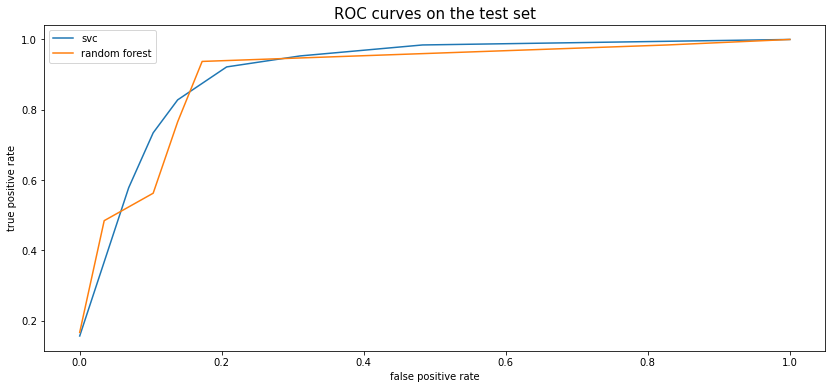

In [87]:
plt.figure(figsize=(14,6))
sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves on the test set', fontsize=15)
plt.legend()
plt.show()

In [91]:
#calcualate the areas under the curve
roc_auc_svc_test = roc_auc_score(y_test, svc_pred_prob)
roc_auc_svc_test


0.9245689655172413

In [92]:
roc_auc_rf_test = roc_auc_score(y_test, rf_pred_prob)
roc_auc_rf_test


0.9105603448275862

In [94]:
results_cv['roc_auc on the test set'] = pd.Series([roc_auc_svc_test, 
                                                   roc_auc_rf_test])

results_cv
#the new results panda series to show our results of the models

,model,f1-score on cross-validation,f1-score on the test set,roc_auc on the test set
0,svm,0.832519,0.878788,0.924569
1,random forest,0.852917,0.878788,0.910560


## FINAL RESULTS: we see that the SVM and random forest have about the same accuracy